In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate Analysis on Numerical Column

## Age

***Conclusions***

 - Age is almost normally distributed
 - Around 20% of the values are missing
 - There are some outliers present 

In [4]:
#Summary statistic
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

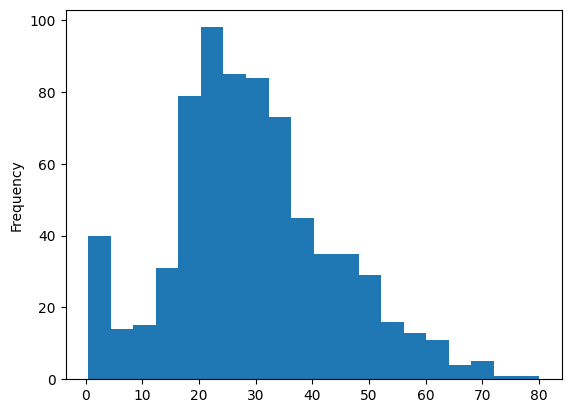

In [5]:
#Histogram
df['Age'].plot(kind = "hist", bins = 20)

*Most passengers are of the age group 20-40*

<Axes: ylabel='Density'>

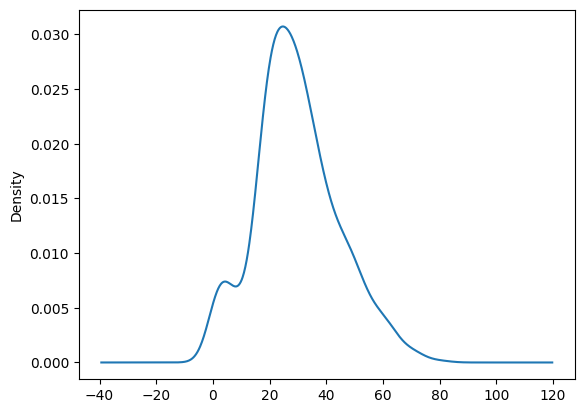

In [6]:
#The distribution of the data
df['Age'].plot(kind = "kde")

In [7]:
#Skewness
df['Age'].skew()

0.38910778230082704

*as skewness is closer to 0, we can say that the data is almost normally distributed*

<Axes: >

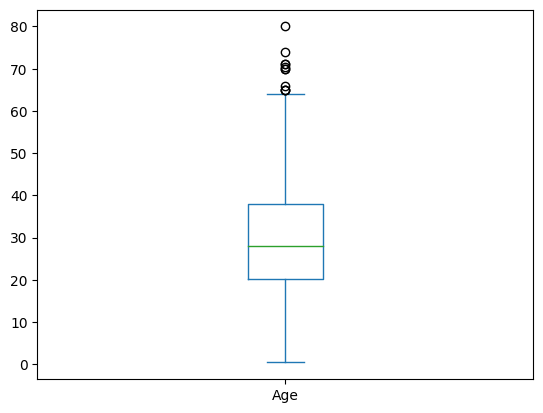

In [8]:
#Boxp;ot
df['Age'].plot(kind = "box")

*Outliers are present above 65*

In [9]:
#are the outliers part of the data?
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [10]:
#Missing values

df['Age'].isnull().sum()

177

In [11]:
#Proportion of missing values

df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

## Fare

***Conclusions***

- Fare column is positvely skewed
- Fare column contains grouped fare and not individual fare. 
- We need to create a new columns 


In [12]:
#Summary statistic

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

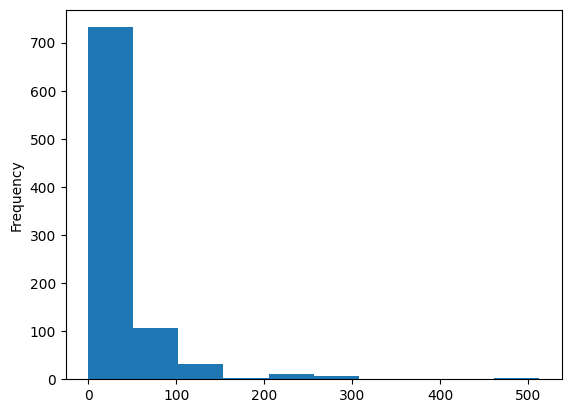

In [13]:
# Histogram

df["Fare"].plot(kind = "hist")

<Axes: ylabel='Density'>

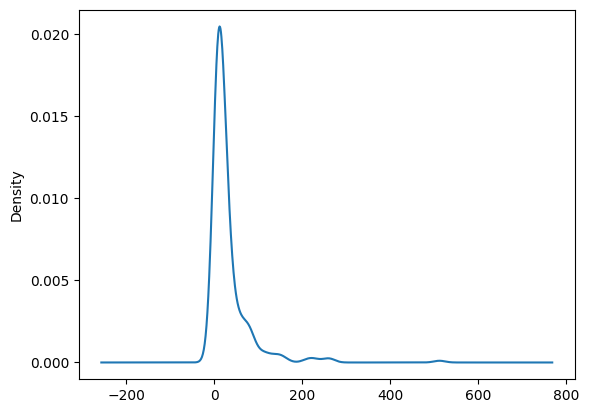

In [14]:
#Distribution of the data

df['Fare'].plot(kind = "kde")

In [15]:
#Skewness of the data

df['Fare'].skew()

4.787316519674893

*The data is highly positively skewed*

<Axes: >

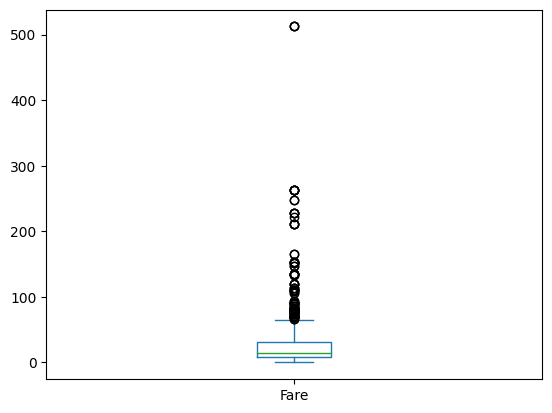

In [16]:
#Detecting outliers using boxplot

df['Fare'].plot(kind = 'box')

In [17]:
#Are outliers a part of the data?

df[df['Fare']> 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


*Three passengers have fare greater than 300, but their ticket is the same. This means that in the fare column, the whole family's accumulated fare is given, i.e. individual fare of the passengers are not given*

In [18]:
#Missing values

df['Fare'].isnull().sum()

0

# Univariate Analysis on Cateogircal Column

### Survived

***Conclusions***

- Out of 891 passengers, 549 passengers died and 342 survived
- The accident can be termed as "severe" as more than half of the passengers died 

In [19]:
df['Survived'].shape

(891,)

In [20]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

*Only 342 survived*

<Axes: xlabel='Survived'>

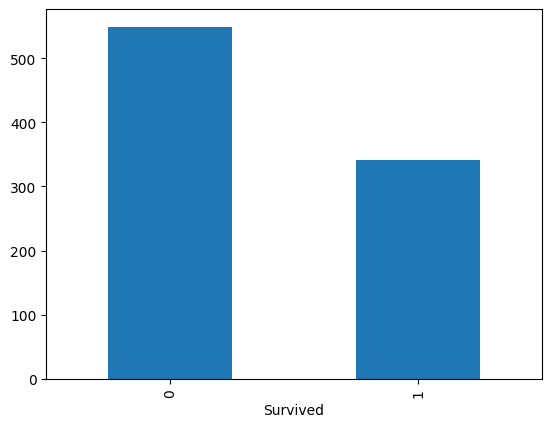

In [21]:
#Visualizing the people who survived or died'
df['Survived'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

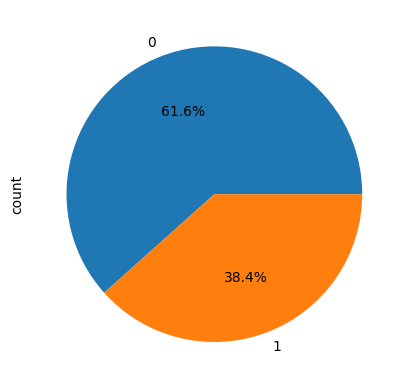

In [22]:
#Percentage of people who survived and died
df['Survived'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

*more than 50% of the passengers dies hence we can conclude that it was a deadly accident*

In [23]:
df['Survived'].isnull().sum()

0

### PClass - Passnger class

***Conclusions***

- 491 passengers are travelling in the first class which is the maximum.
- Interestingly, 1st class has the second second highest number of passengers as opposed to the 2nd class which has the least number of passengers travelling

In [24]:
df['Pclass'].shape

(891,)

In [25]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

*Maximum passengers are from the third class*

<Axes: xlabel='Pclass'>

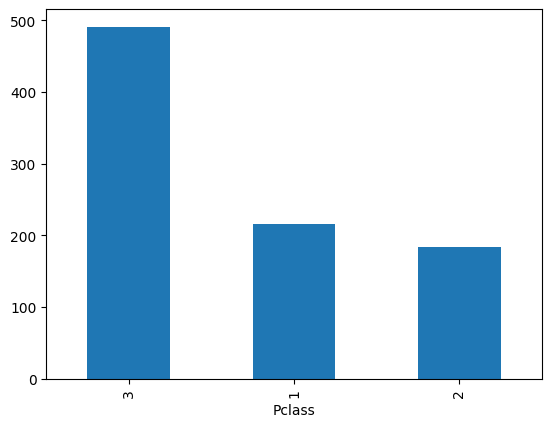

In [26]:
#visualizing the number of passengers from each class

df['Pclass'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

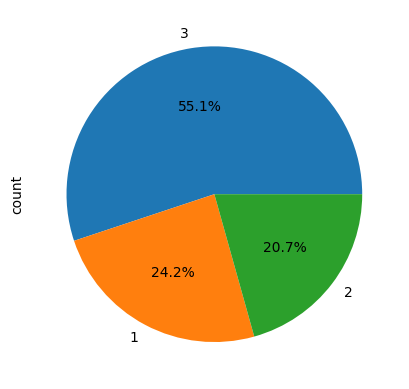

In [27]:
df['Pclass'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

### Sex

***Conclusions***

- Male passengers are more than the female passengers

In [28]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

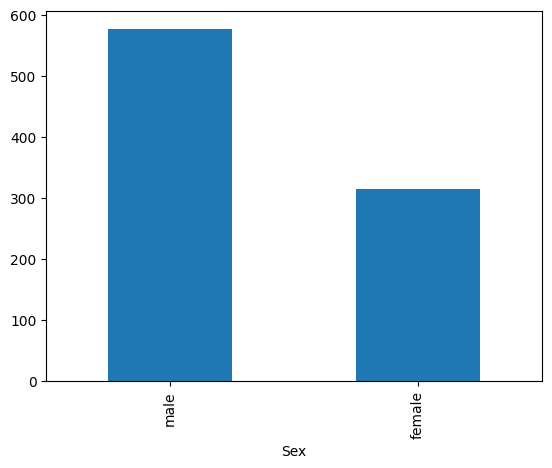

In [29]:
df['Sex'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

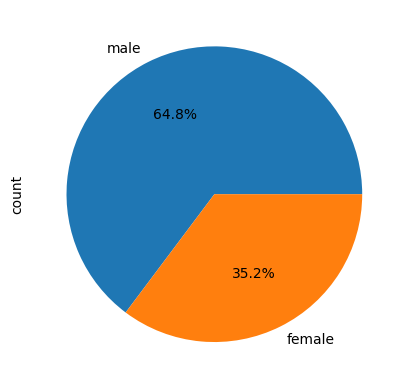

In [30]:
df['Sex'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

### SibSP - siblings and spouse

***Conclusions***

- most passengers are travelling alone

In [31]:
df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

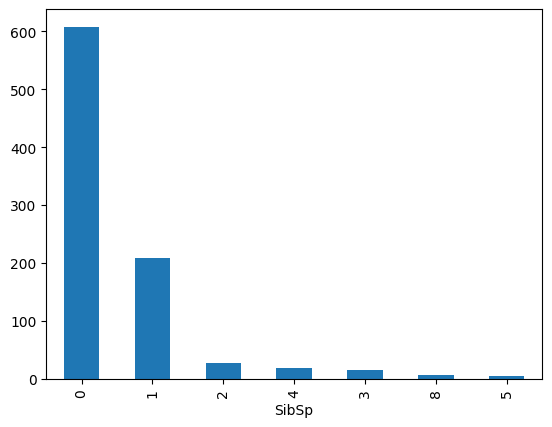

In [32]:
df["SibSp"].value_counts().plot(kind = "bar")

In [33]:
df["SibSp"].isnull().sum()

0

### Parch - Parents and children

***Conclusions***

- most passengers are travelling alone
- Parch and SibSp can be merged together to form a new columns called "family_size"
- We can also create a new column for people who are travelling alone to get more insights

In [34]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

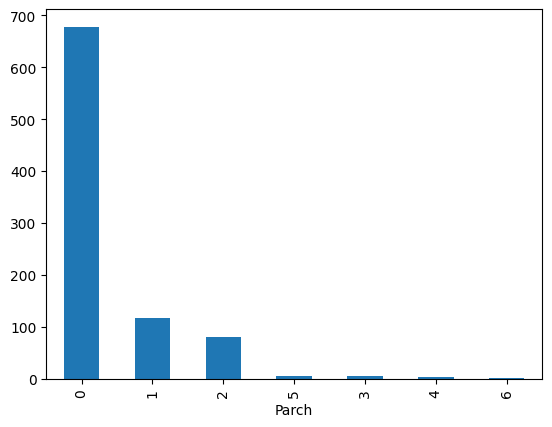

In [35]:
df["Parch"].value_counts().plot(kind = "bar")

In [36]:
df["Parch"].isnull().sum()

0

### Embarked

* S - South Hampton (the beginning of the voyage)
* C - Cherbourg
* Q - Queenstown (last stop before the accident)
***Conclusions***

- most passengers are travelling alone
- Parch and SibSp can be merged together to form a new columns called "family_size"
- We can also create a new column for people who are travelling alone to get more insights

In [37]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

*Most passengers aboarded the ship at the first stop*

<Axes: xlabel='Embarked'>

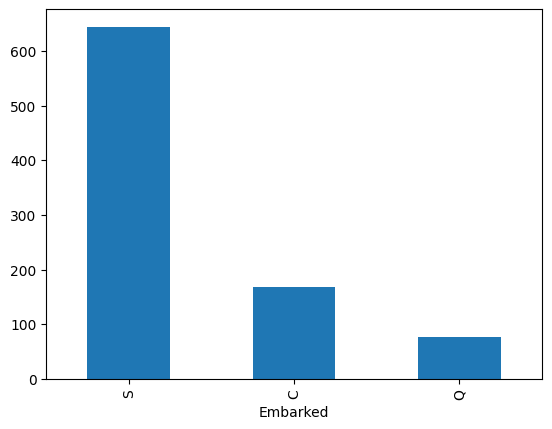

In [38]:
df['Embarked'].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

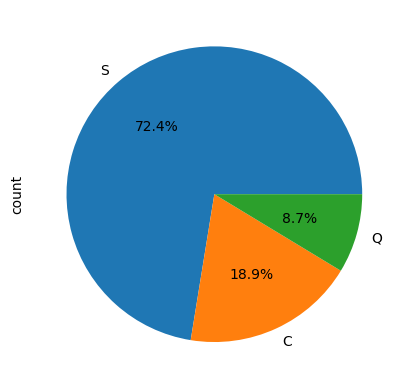

In [39]:
df['Embarked'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

# Bivariate Analysis 